# Import packages

In [1]:
import numpy as np
from numpy import array, sin, cos

import tensorflow as tf

from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.models import Sequential

import matplotlib.pyplot as plt

# Miscs

In [2]:
def draw(x, y, dpi=100, method='scatter', color='cornflowerblue', **kwargs):
    fig = plt.figure(dpi=dpi)
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    if method == 'scatter':
        ax.scatter(x, y, c=color, **kwargs)
    else:
        ax.plot(x, y, c=color, **kwargs)

def multidraw(data, dpi=100, method='scatter', **kwargs):
    fig = plt.figure(dpi=dpi)
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    for x, y in data:
        if method == 'scatter':
            ax.scatter(x, y, **kwargs)
        else:
            ax.plot(x, y, **kwargs)

# General Model

In [3]:
class GenModel:
    def __call__(self, *args):
        return self.model.__call__(*args)
        
    def compile(self, **kwargs):
        pass
         
    def fit(self, x, y, **kwargs):
        self.model.fit(x, y, **kwargs)
    
    def predict(self, x):
        return self.model.predict(x)

    def evaluate(self, x, y):
        self.model.evaluate(x, y)
    
    def summary(self):
        self.model.summary()
    
    def save(self, path):
        self.model.save(path)

# Linear Regression

## Define class

In [4]:
class LinearRegression(GenModel):
    def __init__(self, ndim):
        self.model = Sequential([
                                 Input(ndim),
                                 Dense(1)
        ]) 

    def compile(self, **kwargs):
        self.model.compile(loss='mse', **kwargs)

## Test

### Generate random data

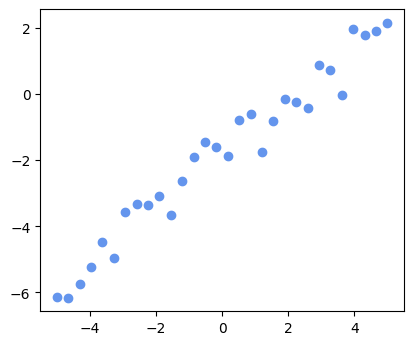

In [5]:
nsample = 30
x1 = np.linspace(-5, 5, nsample)
y1 = x1 * 0.75 - 3 + np.random.rand(nsample) * 2
data_train1 = x1.reshape(nsample, 1), y1
draw(x1, y1)

### Train model

In [6]:
model1 = LinearRegression(1)
opt = SGD(learning_rate=0.1)
model1.compile(optimizer=opt)
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
model1.fit(*data_train1, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 767ms/step - loss: 7.5379
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 4.7944
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 3.0839
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 2.0168
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 1.3508
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.9349
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6750
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5125
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.4109
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 0.3473


### Evaluate

In [8]:
model1.evaluate(*data_train1)

1/1 [==============================] - 0s 81ms/step - loss: 0.3075


In [9]:
y_pred1 = model1(*data_train1)

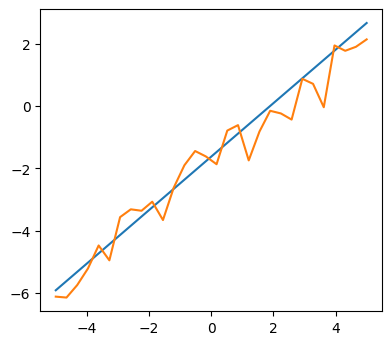

In [10]:
multidraw([[x1, y_pred1], [x1, y1]], method='plot')

# Logistic Regression

## Define class

In [11]:
class LogisticRegression(GenModel):
    def __init__(self, ndim):
        self.model = Sequential([
                                 Input(ndim),
                                 Dense(1, activation='sigmoid')
        ]) 

    def compile(self, **kwargs):
        self.model.compile(
            loss='binary_crossentropy',
            metrics='accuracy',
            **kwargs
        )

## Test

### Download MNIST dataset

In [12]:
from keras.datasets import mnist

In [13]:
(x_train2, y_train2), (x_test2, y_test2) = mnist.load_data(path='mnist.npz')
x_train2.shape, y_train2.shape, x_test2.shape, y_test2.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**Note: Choose 3s' and 7s' images as input**

In [14]:
# Make train/validation dataset
mask1 = np.logical_or(y_train2 == 3, y_train2 == 7).nonzero()
x_37 = x_train2[mask1].reshape(-1, 28 * 28).astype("float32") / 255
y_37 = y_train2[mask1]
y_37 = np.where(y_37 == 3, 1, 0).astype("float32")

# Train, val split
x_37_train = x_37[:10000]
x_37_val   = x_37[10000:]
y_37_train = y_37[:10000]
y_37_val   = y_37[10000:]

train_data2 = x_37_train, y_37_train
val_data2 = x_37_val, y_37_val

# Make test dataset
mask2 = np.logical_or(y_test2 == 3, y_test2 == 7).nonzero()
xt_37 = x_test2[mask2].reshape(-1, 28 * 28).astype("float32") / 255
yt_37 = y_test2[mask2]
yt_37 = np.where(yt_37 == 3, 1, 0).astype("float32")

test_data2 = xt_37, yt_37

x_37_train.shape, x_37_val.shape, y_37_train.shape, y_37_val.shape, xt_37.shape, yt_37.shape

((10000, 784), (2396, 784), (10000,), (2396,), (2038, 784), (2038,))

### Train model

In [15]:
model2 = LogisticRegression(28 * 28)
model2.compile()
model2.fit(*train_data2, epochs=10, validation_data=val_data2)

Epoch 1/10
313/313 [==============================] - 1s 4ms/step - loss: 0.2667 - accuracy: 0.9353 - val_loss: 0.0549 - val_accuracy: 0.9862
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0586 - accuracy: 0.9824 - val_loss: 0.0407 - val_accuracy: 0.9879
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0523 - accuracy: 0.9827 - val_loss: 0.0397 - val_accuracy: 0.9875
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0462 - accuracy: 0.9854 - val_loss: 0.0355 - val_accuracy: 0.9896
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0308 - val_accuracy: 0.9904
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0453 - accuracy: 0.9871 - val_loss: 0.0301 - val_accuracy: 0.9904
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0305 - accuracy: 0.9901 - val_loss: 0.0297 - val_accuracy: 0.9896
Epoch 

### Evaluate

In [16]:
model2.evaluate(*test_data2)

64/64 [==============================] - 0s 2ms/step - loss: 0.0554 - accuracy: 0.9853


# Softmax Regression

## Define class

In [17]:
class SoftmaxRegression(GenModel):
    def __init__(self, inputdim, outputdim):
        self.model = Sequential([
                                 Input(inputdim),
                                 Dense(outputdim, activation='softmax')
        ]) 

    def compile(self, **kwargs):
        self.model.compile(
            loss='sparse_categorical_crossentropy',
            metrics='accuracy',
            **kwargs
        )

## Test

### Prepare data

In [18]:
(x3, y3), (x_test3, y_test3) = mnist.load_data(path='mnist.npz')

x3      = x3.reshape(-1, 28*28)
x_test3 = x_test3.reshape(-1, 28*28)

# Split train/val
x_train3 = x3[:50000]
y_train3 = y3[:50000]
x_val3   = x3[50000:]
y_val3   = y3[50000:]

# Make train/validate/test dataset
train_data3 = x_train3, y_train3
val_data3  = x_val3, y_val3
test_data3  = x_test3, y_test3

x_train3.shape, y_train3.shape, x_val3.shape, y_val3.shape, x_test3.shape, y_test3.shape

((50000, 784), (50000,), (10000, 784), (10000,), (10000, 784), (10000,))

### Train model

In [19]:
model3 = SoftmaxRegression(28 * 28, 10)
model3.compile()
model3.fit(*train_data3, validation_data=val_data3, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 16.7298 - accuracy: 0.7592 - val_loss: 8.1746 - val_accuracy: 0.8505
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 6.5987 - accuracy: 0.8702 - val_loss: 5.5410 - val_accuracy: 0.8875
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 5.9018 - accuracy: 0.8750 - val_loss: 6.7455 - val_accuracy: 0.8550
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 5.5182 - accuracy: 0.8784 - val_loss: 5.1839 - val_accuracy: 0.8878
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 5.2693 - accuracy: 0.8837 - val_loss: 4.5759 - val_accuracy: 0.9046
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 5.1227 - accuracy: 0.8845 - val_loss: 4.8094 - val_accuracy: 0.8999
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 5.0672 - accuracy: 0.8877 - val_loss: 5.4822 - val_accuracy

### Evaluate

In [20]:
model3.evaluate(*test_data3)

313/313 [==============================] - 0s 1ms/step - loss: 5.5332 - accuracy: 0.8897


# Neural network

## Define class

In [21]:
class NeuralNetwork(GenModel):
    def __init__(self, inputdim, outputdim, final_activation=None):
        self.model = Sequential([
                                 Input(inputdim),
                                 Dense(10, activation='elu'),
                                 Dense(10, activation='elu'),
                                 Dense(10, activation='elu'),
                                 Dense(10, activation='elu'),
                                 Dense(outputdim, activation=final_activation)
        ])

    def compile(self, **kwargs):
        self.model.compile(**kwargs)

## Test

**Use neural network to draw a heart**

### Construct heart's coordinate

In [22]:
def h(t): return np.vstack([16*sin(t) ** 3, 
                            13*cos(t)-5*cos(2*t)-2*cos(3*t)-cos(4*t)]).T

In [23]:
input = np.linspace(0, 6.1, 500)
output = h(input)
x, y = output[:, 0], output[:, 1]

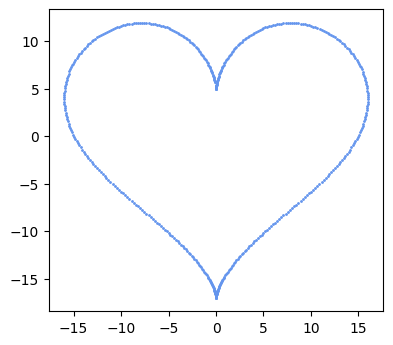

In [24]:
draw(output[:, 0], output[:, 1], s=1)

### Train model

In [25]:
model4 = NeuralNetwork(1, 2)
model4.compile(loss='mse')
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 22        
Total params: 372
Trainable params: 372
Non-trainable params: 0
_________________________________________________________________


In [26]:
model4.fit(input, output, epochs=30, batch_size=1)

Epoch 1/30
500/500 [==============================] - 1s 2ms/step - loss: 92.5816
Epoch 2/30
500/500 [==============================] - 1s 2ms/step - loss: 71.6447
Epoch 3/30
500/500 [==============================] - 1s 2ms/step - loss: 47.6659
Epoch 4/30
500/500 [==============================] - 1s 2ms/step - loss: 28.1907
Epoch 5/30
500/500 [==============================] - 1s 2ms/step - loss: 20.2829
Epoch 6/30
500/500 [==============================] - 1s 2ms/step - loss: 13.6671
Epoch 7/30
500/500 [==============================] - 1s 2ms/step - loss: 11.3764
Epoch 8/30
500/500 [==============================] - 1s 2ms/step - loss: 7.9973
Epoch 9/30
500/500 [==============================] - 1s 2ms/step - loss: 6.3984
Epoch 10/30
500/500 [==============================] - 1s 2ms/step - loss: 5.4898
Epoch 11/30
500/500 [==============================] - 1s 2ms/step - loss: 3.9607
Epoch 12/30
500/500 [==============================] - 1s 2ms/step - loss: 3.7701
Epoch 13/30
500/50

### Evaluate

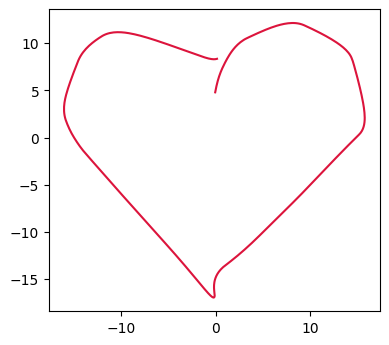

In [27]:
pred = model4.predict(input)
x_pred, y_pred = pred[:, 0], pred[:, 1]
draw(x_pred, y_pred, method='plot', color='crimson')

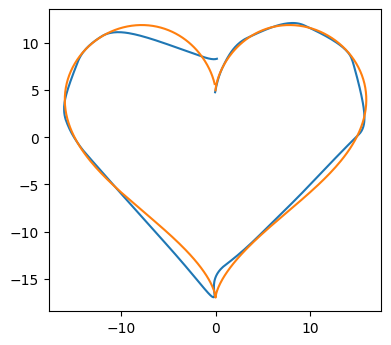

In [28]:
multidraw([[x_pred, y_pred], [x, y]], method='plot')